(182, 590)


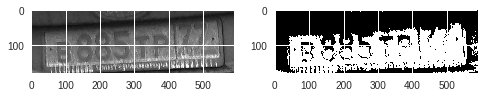

In [81]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.filters import threshold_yen
import matplotlib.pyplot as plt

filename = "4.bmp"
car_image = imread(filename, as_grey=True)
# it should be a 2 dimensional array
print(car_image.shape)

# the next line is not compulsory however, a grey scale pixel
# in skimage ranges between 0 & 1. multiplying it with 255
# will make it range between 0 & 255 (something we can relate better with

gray_car_image = car_image * 255
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_car_image, cmap="gray")
# threshold_value = threshold_yen(gray_car_image)
# binary_car_image = gray_car_image <= threshold_value
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
ax2.imshow(binary_car_image, cmap="gray")
plt.show()

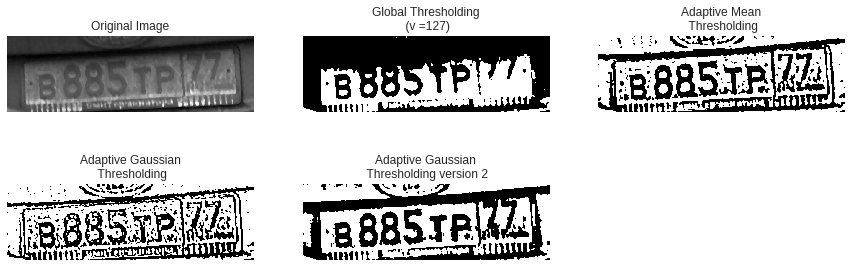

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
xrange=range
filename = "4.bmp"
global_v = 127
img = cv.imread(filename,0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,global_v,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,23,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,23,2)
th4 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 115, 1)
titles = ['Original Image', "Global Thresholding\n (v ="+ str(global_v) +")",
            'Adaptive Mean\n Thresholding', 'Adaptive Gaussian\n Thresholding',
         'Adaptive Gaussian\n Thresholding version 2']
images = [img, th1, th2, th3, th4]
f = plt.figure(figsize=(15,5))
for i in xrange(5):
    f.add_subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

[0, 87, 242, 256]


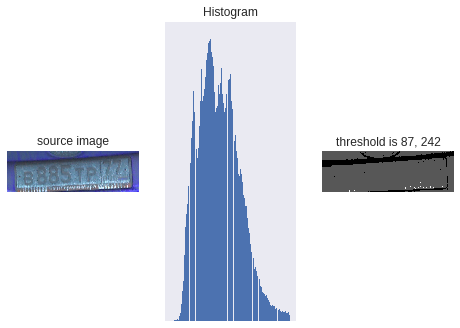

In [37]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
 
 

def expand(k, m):
    for i in range(len(k)):
        k[i] = k[i][:2] + '0'*(8*m+2 - len(k[i])) + k[i][2:len(k[i])]
    return k
 
 
def Hist(image):
    a=[0]*256
    h=image.shape[0]
    w=image.shape[1]
    MN=h*w
    average=0.0
    for i in range(w):
        for j in range(h):
            pixel=int(image[j][i])
            a[pixel]=a[pixel]+1
    for i in range(256):
        a[i]=a[i]/float(MN)
        average=average+a[i]*i
    return a, average
 
 

def getTh(seed, m):
    th = [0, 256]
    seedInt = int(seed, 2)
    for i in range(0, m):
        tmp = seedInt & 255
        if tmp != 0:
            th.append(tmp)
        seedInt = seedInt >> 8
    th.sort()
    return th
 
 

def fitness(seed, p, average, m):
    Var = [0.0] * len(seed)
    g_muT = 0.0
 
    for i in range(256):
        g_muT = g_muT + i * p[i]
 
    for i in range(len(seed)):
        th = getTh(seed[i], m)
        for j in range(len(th)-1):
            w = [0.0] * (len(th)-1)
            muT = [0.0] * (len(th)-1)
            mu = [0.0] * (len(th)-1)
            for k in range(th[j], th[j+1]):
                w[j] = w[j] + p[k]
                muT[j] = muT[j] +  + p[k] * k
            if w[j] > 0:
                mu[j] = muT[j] / w[j]
                Var[i] = Var[i] + w[j] * pow(mu[j] - g_muT, 2)
    return Var
 
 

def wheel_selection(seed, Var):
    var = [0.0]*len(Var)
    s = 0.0
    n = ['']*len(seed)
    sumV = sum(Var)
    for i in range(len(Var)):
        var[i] = Var[i]/sumV
    for i in range(1, len(Var)):
        var[i] = var[i] + var[i-1]
    for i in range(len(seed)):
        s = random.random()
        for j in range(len(var)):
            if s <= var[j]:
                n[i] = seed[j]
    return n
 
 

def Cross(Next, m):
    for i in range(0, len(Next) - 1, 2):
        if random.random() < 0.7:
            if m > 2:
                tmp = Next[i][10:]
                Next[i] = Next[i][:10] + Next[i+1][10:]
                Next[i+1] = Next[i+1][:10] + tmp
            else:
                tmp = Next[i][6:]
                Next[i] = Next[i][:6] + Next[i+1][6:]
                Next[i+1] = Next[i+1][:6] + tmp
    return Next
 
 

def Variation(Next):
   for i in range(len(Next)):
        if random.random()<0.06:
            Next[i]=bin(int(Next[i],2)+2)
   return Next
 
 

def genetic_thres(image, k, m):
    th = image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for t in range(1, len(k)-1):
                if k[t-1] <= image[i][j] < k[t]:
                    th[i][j] = int(k[t-1])
    return th
 
 
# main
filename = "4.bmp"
imagesrc = cv2.imread(filename)
gray = cv2.cvtColor(imagesrc, cv2.COLOR_BGR2GRAY)
 
m = 3
items_x = range(0, imagesrc.shape[0])
items_y = range(0, imagesrc.shape[1])
random.shuffle(list(items_x))
random.shuffle(list(items_y))
x = items_x[0:20*m]
y = items_y[0:20*m]
seed = []
Var = 0.0
times = 0
k = 0
P, average = Hist(gray)
for i in range(0, 20):
    code = int(0)
    for j in range(0, m):
        code = code + gray[x[i*j]][y[i*j]] << j*8
    seed.append(bin(code))
 
while times < 2000:
    Var = fitness(seed, P, average, m)
    Next = wheel_selection(seed, Var)
    Next = Cross(Next, m)
    Next = expand(Variation(Next), m)
    seed = Next
    times = times + 1
 
for j in range(len(Var)):
    if Var[j] == max(Var):
        k = getTh(Next[j], m)
print(k)
 
plt.subplot(131), plt.imshow(imagesrc, "gray")
plt.title("source image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.hist(imagesrc.ravel(), 256)
plt.title("Histogram"), plt.xticks([]), plt.yticks([])
th1 = genetic_thres(gray, k, m)
plt.subplot(133), plt.imshow(th1, "gray")
titleName = ''
for i in range(1, len(k)-1):
    titleName = titleName + str(k[i]) + ', '
titleName = titleName[:len(titleName)-2]
plt.title("threshold is " + titleName), plt.xticks([]), plt.yticks([])
plt.show()

In [0]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
filename = "4.bmp"
img = cv.imread(filename,0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [71]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

filename = "4.bmp"
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
# find normalized_histogram, and its cumulative distribution function
hist = cv.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in xrange(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )

118 117.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
